In [25]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
#Loading the dataset

data = pd.read_csv('data.csv')

# Displaying basic information about the dataset and the first few rows
data_info = data.info()
data_head = data.head()

data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Age                                     10000 non-null  int64 
 1   Health Challenge                        10000 non-null  object
 2   Class Participation                     10000 non-null  object
 3   Academic Performance before Jamb/Waec   10000 non-null  object
 4   Study Habits                            10000 non-null  object
 5   Assignment/Homework Completion          10000 non-null  object
 6   Extracurricular Involvement             7562 non-null   object
 7   Disciplinary Issue                      10000 non-null  object
 8   Attendance Status                       10000 non-null  object
 9   Motivation for Jamb/Waec                10000 non-null  object
 10  Resource Access (1-3)                   10000 non-null  int64 
 11  Und

In [3]:
data.head(10)

,Age,Health Challenge,Class Participation,Academic Performance before Jamb/Waec,Study Habits,Assignment/Homework Completion,Extracurricular Involvement,Disciplinary Issue,Attendance Status,Motivation for Jamb/Waec,...,Understanding of Material (1-3),Time Management (1-3),Tutorial Hours for Jamb/Waec,Daily Self Study Hours for Jamb/Waec,Jamb Score,Family Income Range,Parent Education Level,Living Conditions,Parent Engagement with School/Teachers,Exam Status
0,20,No,Moderate,Excellent,Poor,Sometimes,High,No,Very Poor,Low,...,1,2,82,6,346,Low,Secondary,Moderate,Low,Pass
1,30,Yes,Moderate,Poor,Average,Always,NaN,Yes,Irregular,Low,...,2,3,37,3,182,High,Secondary,Moderate,Low,Fail
2,21,Yes,Moderate,Good,Good,Sometimes,Low,Yes,Regular,High,...,2,3,16,10,174,Medium,Primary,Poor,Low,Fail
3,24,No,Active,Fair,Good,Sometimes,Low,No,Irregular,Low,...,3,2,60,10,214,Medium,Secondary,Poor,Low,Pass
4,27,No,Rarely,Good,Average,Sometimes,NaN,No,Irregular,Moderate,...,2,3,9,11,350,Medium,Secondary,Poor,High,Pass
5,21,Yes,Active,Good,Poor,Always,NaN,Yes,Very Poor,Moderate,...,2,1,21,7,141,Low,Secondary,Poor,High,Fail
6,27,No,Active,Fair,Poor,Rarely,Moderate,No,Irregular,Low,...,3,1,41,6,336,Low,Secondary,Moderate,High,Pass
7,25,No,Rarely,Good,Good,Always,NaN,No,Regular,High,...,3,3,88,3,390,High,Primary,Poor,High,Pass
8,18,No,Moderate,Excellent,Poor,Rarely,Low,Yes,Irregular,High,...,1,3,9,10,107,Low,Primary,Good,Low,Fail
9,25,No,Moderate,Fair,Poor,Rarely,Moderate,Yes,Very Poor,High,...,3,2,82,8,239,Low,Primary,Good,Moderate,Pass


In [16]:
# Fill missing values in the 'Extracurricular Involvement' column with 'Moderate' (assuming it's the most common value)
data['Extracurricular Involvement'].fillna('Moderate')

# Verify that there are no more missing values in this column
missing_extracurricular_values = data['Extracurricular Involvement'].isnull().sum()

missing_extracurricular_values

0

In [17]:
data_head = data.head(10)

In [18]:
data_head

,Age,Health Challenge,Class Participation,Academic Performance before Jamb/Waec,Study Habits,Assignment/Homework Completion,Extracurricular Involvement,Disciplinary Issue,Attendance Status,Motivation for Jamb/Waec,...,Understanding of Material (1-3),Time Management (1-3),Tutorial Hours for Jamb/Waec,Daily Self Study Hours for Jamb/Waec,Jamb Score,Family Income Range,Parent Education Level,Living Conditions,Parent Engagement with School/Teachers,Exam Status
0,20,No,Moderate,Excellent,Poor,Sometimes,High,No,Very Poor,Low,...,1,2,82,6,346,Low,Secondary,Moderate,Low,Pass
1,30,Yes,Moderate,Poor,Average,Always,Moderate,Yes,Irregular,Low,...,2,3,37,3,182,High,Secondary,Moderate,Low,Fail
2,21,Yes,Moderate,Good,Good,Sometimes,Low,Yes,Regular,High,...,2,3,16,10,174,Medium,Primary,Poor,Low,Fail
3,24,No,Active,Fair,Good,Sometimes,Low,No,Irregular,Low,...,3,2,60,10,214,Medium,Secondary,Poor,Low,Pass
4,27,No,Rarely,Good,Average,Sometimes,Moderate,No,Irregular,Moderate,...,2,3,9,11,350,Medium,Secondary,Poor,High,Pass
5,21,Yes,Active,Good,Poor,Always,Moderate,Yes,Very Poor,Moderate,...,2,1,21,7,141,Low,Secondary,Poor,High,Fail
6,27,No,Active,Fair,Poor,Rarely,Moderate,No,Irregular,Low,...,3,1,41,6,336,Low,Secondary,Moderate,High,Pass
7,25,No,Rarely,Good,Good,Always,Moderate,No,Regular,High,...,3,3,88,3,390,High,Primary,Poor,High,Pass
8,18,No,Moderate,Excellent,Poor,Rarely,Low,Yes,Irregular,High,...,1,3,9,10,107,Low,Primary,Good,Low,Fail
9,25,No,Moderate,Fair,Poor,Rarely,Moderate,Yes,Very Poor,High,...,3,2,82,8,239,Low,Primary,Good,Moderate,Pass


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Age                                     10000 non-null  int64 
 1   Health Challenge                        10000 non-null  object
 2   Class Participation                     10000 non-null  object
 3   Academic Performance before Jamb/Waec   10000 non-null  object
 4   Study Habits                            10000 non-null  object
 5   Assignment/Homework Completion          10000 non-null  object
 6   Extracurricular Involvement             10000 non-null  object
 7   Disciplinary Issue                      10000 non-null  object
 8   Attendance Status                       10000 non-null  object
 9   Motivation for Jamb/Waec                10000 non-null  object
 10  Resource Access (1-3)                   10000 non-null  int64 
 11  Und

In [20]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Check for unique values in categorical columns to identify potential encoding needs
unique_values = {col: data[col].unique() for col in data.columns if data[col].dtype == 'object'}

missing_values, unique_values


(Age                                       0
 Health Challenge                          0
 Class Participation                       0
 Academic Performance before Jamb/Waec     0
 Study Habits                              0
 Assignment/Homework Completion            0
 Extracurricular Involvement               0
 Disciplinary Issue                        0
 Attendance Status                         0
 Motivation for Jamb/Waec                  0
 Resource Access (1-3)                     0
 Understanding of Material (1-3)           0
 Time Management (1-3)                     0
 Tutorial Hours for Jamb/Waec              0
 Daily Self Study Hours for Jamb/Waec      0
 Jamb Score                                0
 Family Income Range                       0
 Parent Education Level                    0
 Living Conditions                         0
 Parent Engagement with School/Teachers    0
 Exam Status                               0
 dtype: int64,
 {'Health Challenge': array(['No', 'Yes'

In [21]:
le = LabelEncoder()

# Categorical columns to encode
categorical_columns = [
    'Health Challenge', 'Class Participation', 'Academic Performance before Jamb/Waec', 
    'Study Habits', 'Assignment/Homework Completion', 'Extracurricular Involvement', 
    'Disciplinary Issue', 'Attendance Status', 'Motivation for Jamb/Waec', 
    'Family Income Range', 'Parent Education Level', 'Living Conditions', 
    'Parent Engagement with School/Teachers', 'Exam Status'
]

# Apply Label Encoding to the columns
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Check the dataset after encoding
data_encoded_head = data.head()

data_encoded_head


,Age,Health Challenge,Class Participation,Academic Performance before Jamb/Waec,Study Habits,Assignment/Homework Completion,Extracurricular Involvement,Disciplinary Issue,Attendance Status,Motivation for Jamb/Waec,...,Understanding of Material (1-3),Time Management (1-3),Tutorial Hours for Jamb/Waec,Daily Self Study Hours for Jamb/Waec,Jamb Score,Family Income Range,Parent Education Level,Living Conditions,Parent Engagement with School/Teachers,Exam Status
0,20,0,1,0,2,2,0,0,2,1,...,1,2,82,6,346,1,1,1,1,1
1,30,1,1,3,0,0,2,1,0,1,...,2,3,37,3,182,0,1,1,1,0
2,21,1,1,2,1,2,1,1,1,0,...,2,3,16,10,174,2,0,2,1,0
3,24,0,0,1,1,2,1,0,0,1,...,3,2,60,10,214,2,1,2,1,1
4,27,0,2,2,0,2,2,0,0,2,...,2,3,9,11,350,2,1,2,0,1


In [30]:
# Define numerical columns
numerical_columns = [
    'Age', 'Jamb Score', 'Tutorial Hours for Jamb/Waec', 
    'Daily Self Study Hours for Jamb/Waec'
]  # Add more numerical columns as necessary

# Set the style for the plots
sns.set(style="whitegrid")

# Function to plot bar charts for categorical features against the target variable
def plot_categorical_features(data, categorical_columns, target):
    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=col, hue=target, data=data)
        plt.title(f'Distribution of {col} by {target}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend(title=target)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


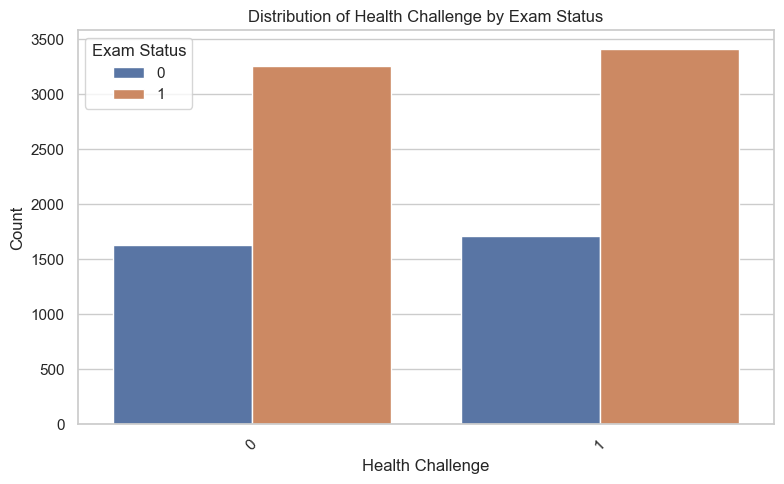

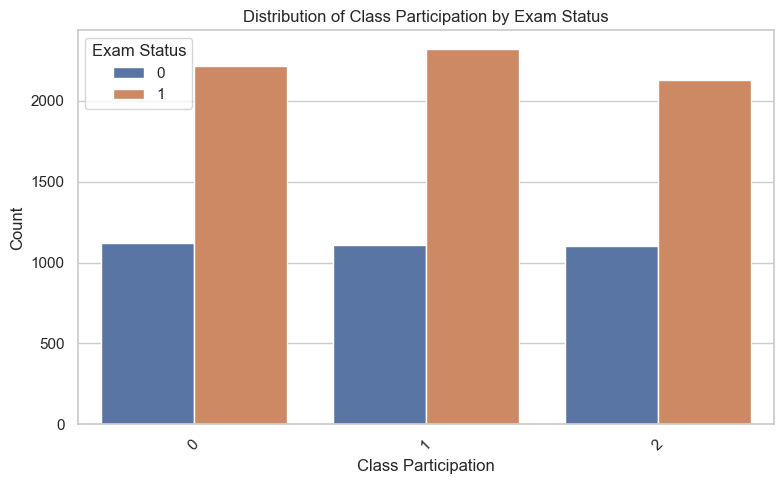

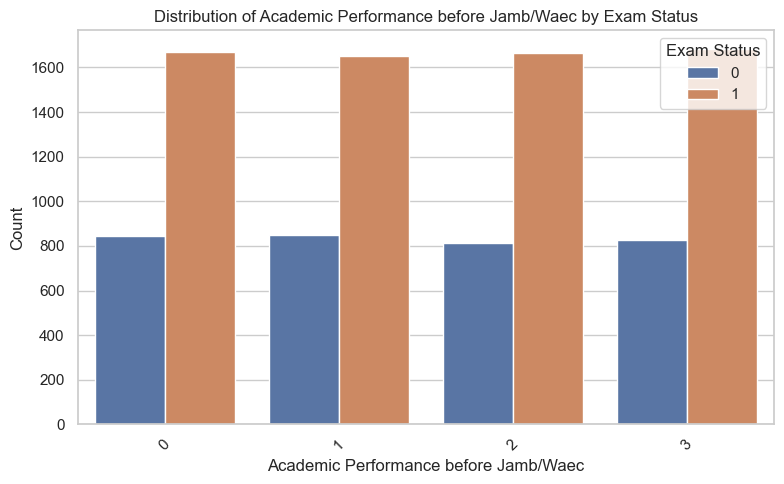

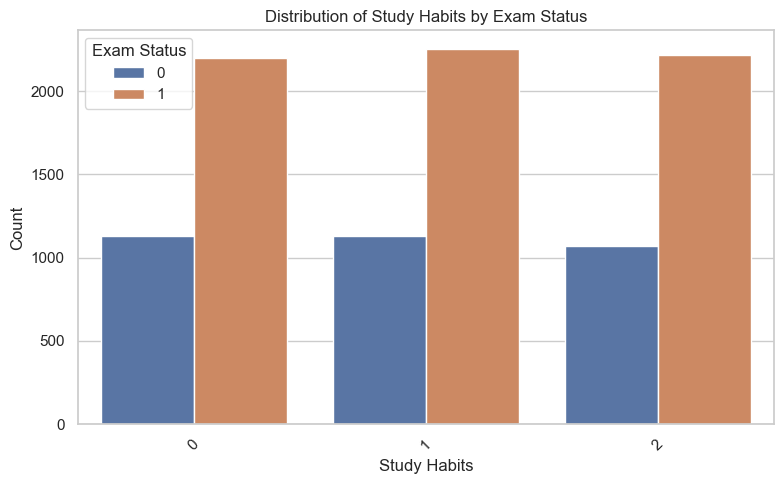

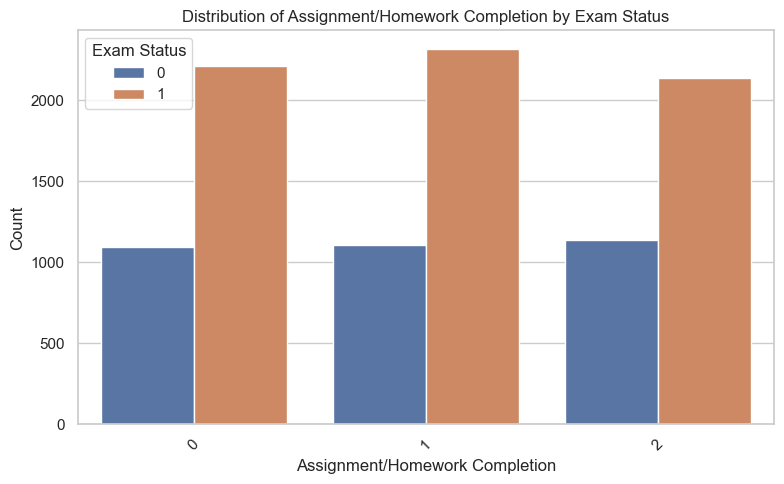

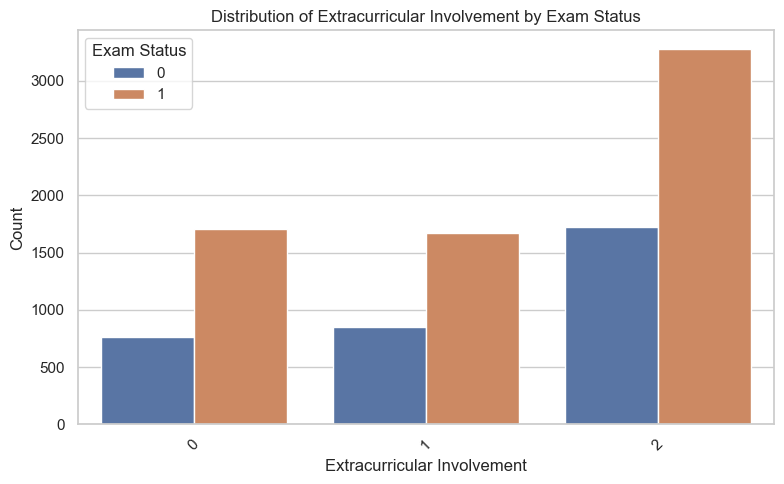

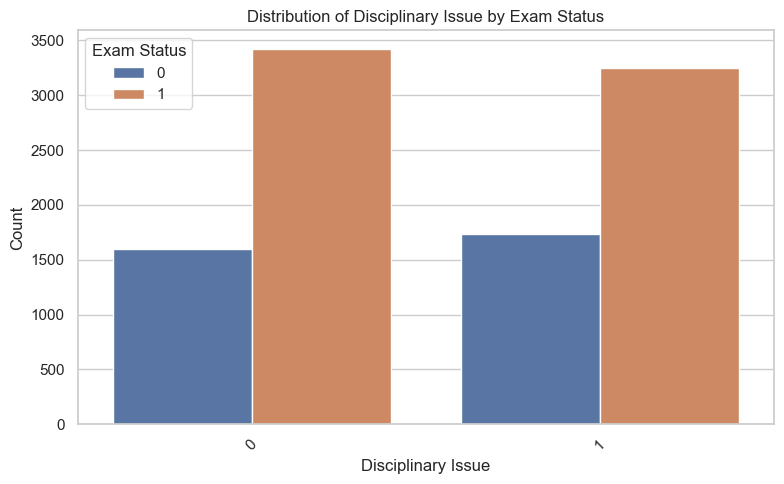

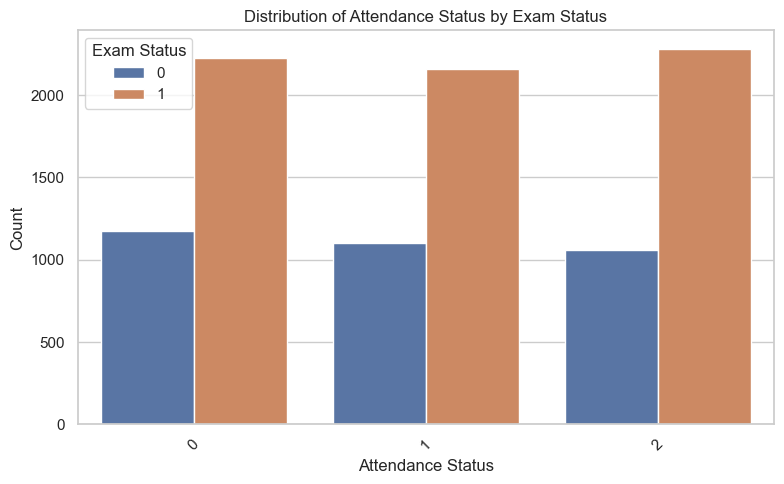

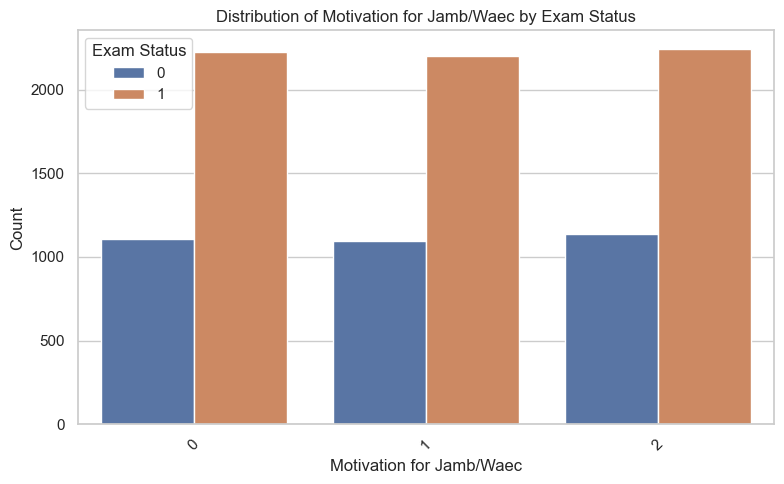

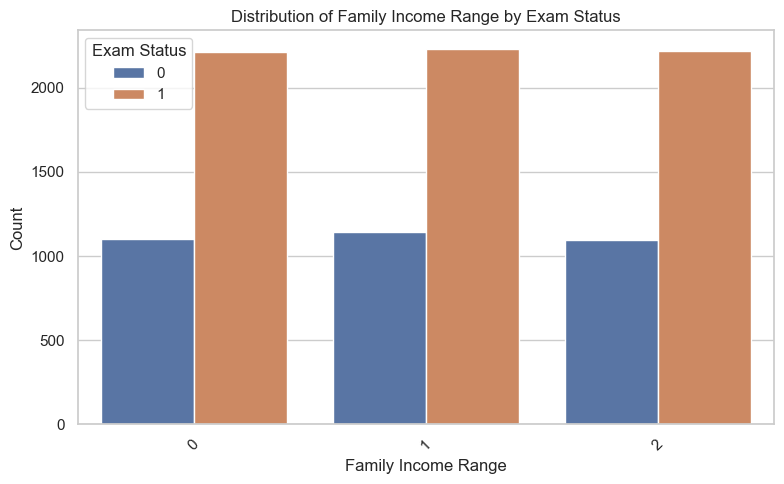

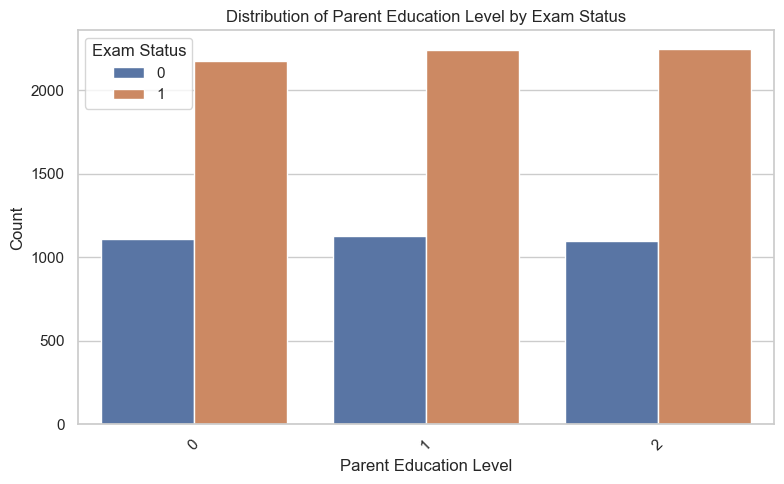

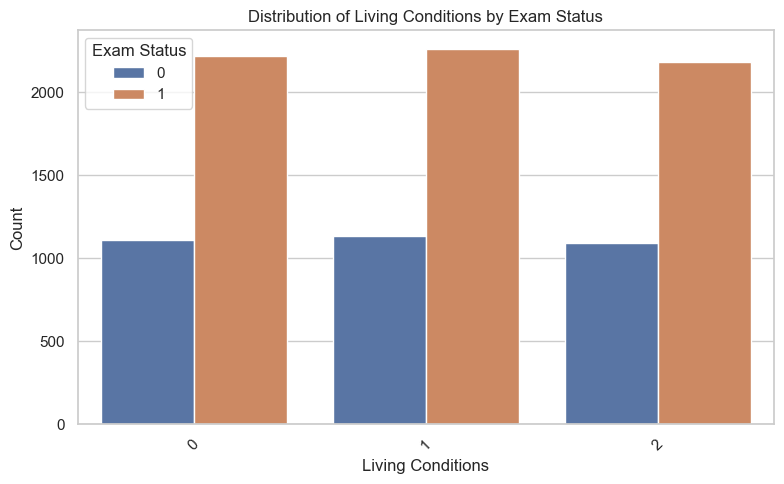

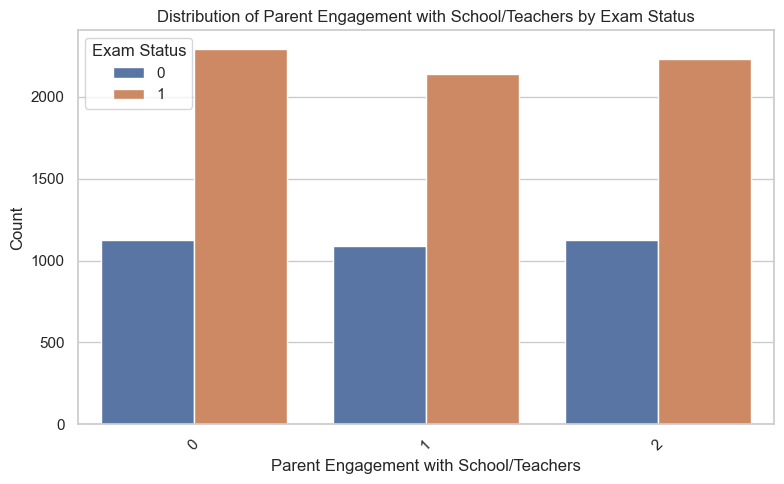

In [27]:
# Plot bar charts for categorical variables against 'Exam Status'
plot_categorical_features(data, categorical_columns[:-1], 'Exam Status')

# Function to plot histograms for numerical features
def plot_numerical_features(data, numerical_columns):
    for col in numerical_columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(data[col], kde=True, bins=20)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

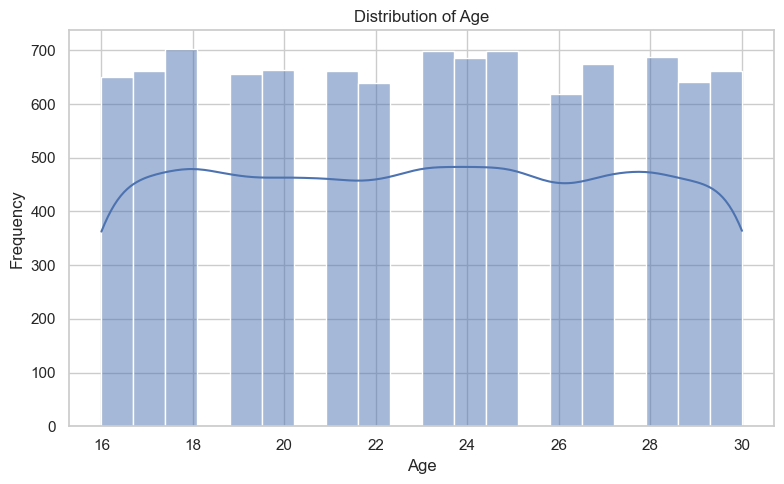

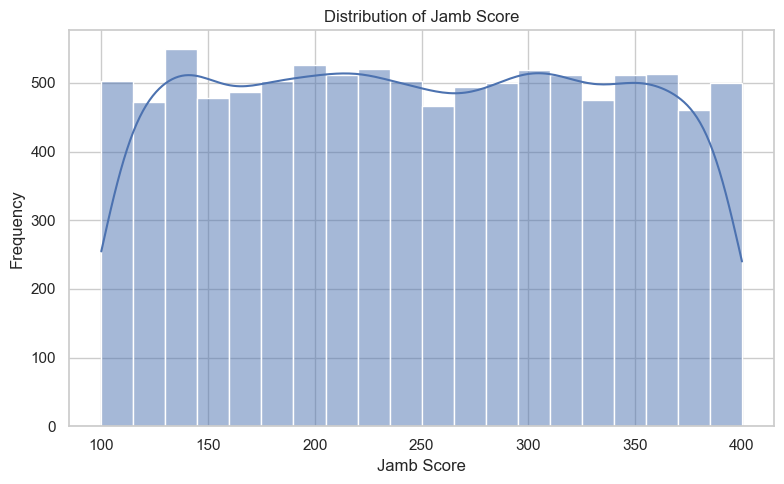

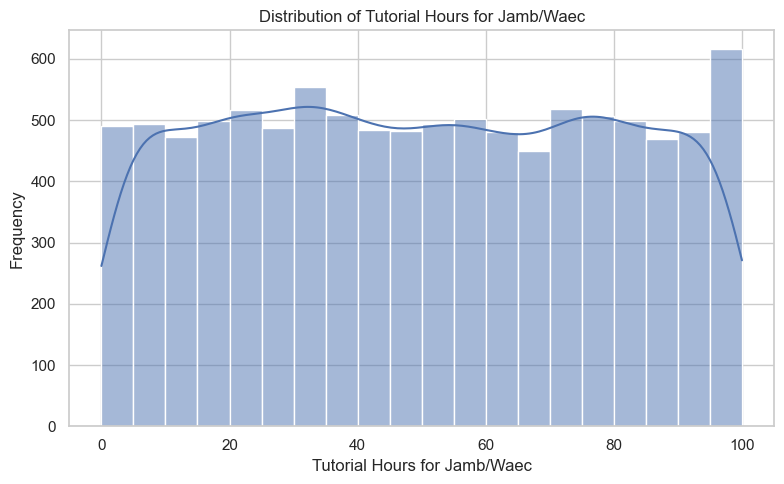

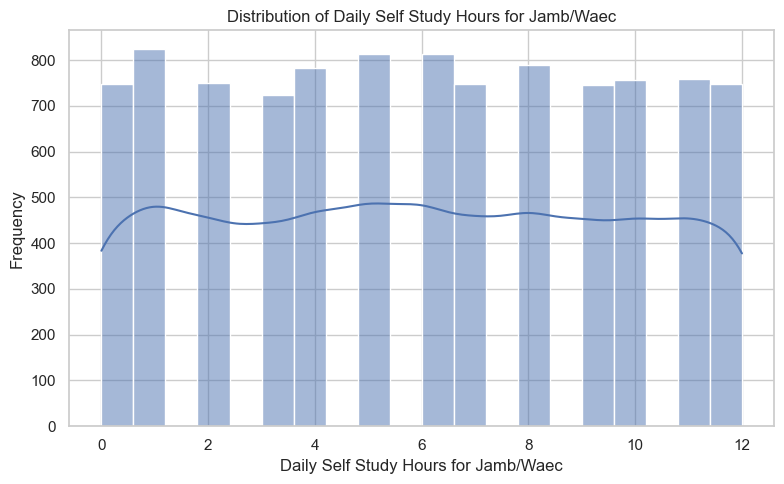

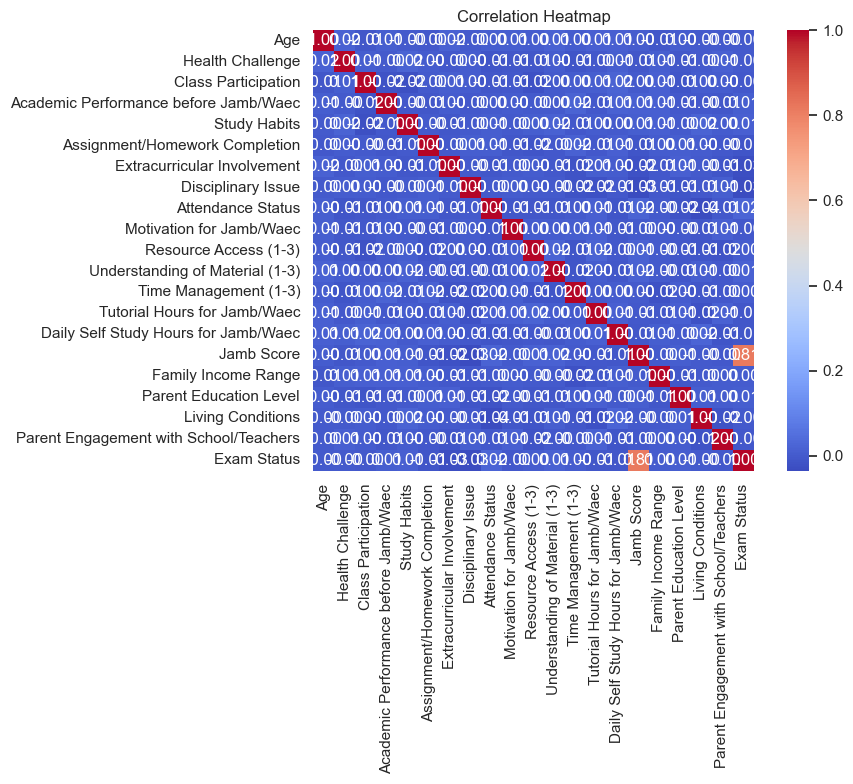

In [28]:

# Plot histograms for numerical features
plot_numerical_features(data, numerical_columns)

# Function to plot a correlation heatmap
def plot_correlation_heatmap(data):
    plt.figure(figsize=(10, 8))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

# Plot the correlation heatmap
plot_correlation_heatmap(data)

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Data Preparation
# Define feature columns (X) and target variable (y)
X = data.drop('Exam Status', axis=1)  # Replace 'Exam Status' with your target column name
y = data['Exam Status']  # Your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Training and Evaluation

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
print("=" * 50)

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
print("Decision Tree Results:")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print("=" * 50)

# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))
print("=" * 50)

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Support Vector Machine Results:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("=" * 50)

# Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)
y_pred_gradient = gradient_boosting_model.predict(X_test)
print("Gradient Boosting Results:")
print(confusion_matrix(y_test, y_pred_gradient))
print(classification_report(y_test, y_pred_gradient))
print("=" * 50)


Logistic Regression Results:
[[ 679    0]
 [   0 1321]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       679
           1       1.00      1.00      1.00      1321

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Decision Tree Results:
[[ 679    0]
 [   0 1321]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       679
           1       1.00      1.00      1.00      1321

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Random Forest Results:
[[ 679    0]
 [   0 1321]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       679
           1       1.00      1.00      1.00      1321

    accuracy              

In [37]:
import joblib

# Assuming the models are stored in variables as follows:
# logistic_model, decision_tree_model, random_forest_model,
# svm_model, gradient_boosting_model

# List of models and their corresponding names
models = {
    "logistic_regression": logistic_model,
    "decision_tree": decision_tree_model,
    "random_forest": random_forest_model,
    "support_vector_machine": svm_model,
    "gradient_boosting": gradient_boosting_model
}

# Save each model to a separate file
for model_name, model in models.items():
    joblib.dump(model, f"{model_name}.pkl")
    print(f"Saved {model_name} to {model_name}.pkl")


Saved logistic_regression to logistic_regression.pkl
Saved decision_tree to decision_tree.pkl
Saved random_forest to random_forest.pkl
Saved support_vector_machine to support_vector_machine.pkl
Saved gradient_boosting to gradient_boosting.pkl
